# Heart Disease Dataset


## Informações



### Context

> Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

>EUA

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

>BR

*Este conjunto de dados data de 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de cardiopatia no paciente. É valor inteiro 0 = sem doença e 1 = doença.*



### Content
>EUA
* age 
* sex
* chest pain type (4 values) - chest pain type
* resting blood pressure - resting blood pressure (in mm Hg on admission to the hospital)
* serum cholestoral in mg/dl 
*  fasting blood sugar > 120 mg/dl -  (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved -  maximum heart rate achieved
* exercise induced angina - exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest - ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* 
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

>BR
* idade
* sexo
* tipo de dor no peito (4 valores) - tipo de dor no peito
* pressão arterial em repouso - pressão arterial em repouso (em mm Hg na admissão ao hospital)
* colesterol sérico em mg/dl
* açúcar no sangue em jejum > 120 mg/dl - (açúcar no sangue em jejum &gt; 120 mg/dl) (1 = verdadeiro; 0 = falso)
* resultados eletrocardiográficos em repouso (valores 0,1,2)
* frequência cardíaca máxima alcançada - frequência cardíaca máxima alcançada
* angina induzida por exercício - angina induzida por exercício (1 = sim; 0 = não)
* oldpeak = depressão do ST induzida pelo exercício em relação ao repouso - depressão do ST induzida pelo exercício em relação ao repouso
* a inclinação do pico do segmento ST do exercício
* número de vasos principais (0-3) coloridos por fluoroscopia
* tal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível

Os nomes e números de CPF dos pacientes foram recentemente removidos do banco de dados, substituídos por valores fictícios.*

## Script

#### Importando libs

In [181]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Carregando dataframe

In [182]:

hd=pd.read_csv("heart.csv")

### Analisando base

In [183]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [184]:
#verificando se tem algum valor nulo
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [185]:
#verificando se tem duplicatas

hd.duplicated().sum()

723

In [186]:
#retirando duplicatas
hd=hd.drop_duplicates()

In [187]:
len(hd)

302

In [188]:
#analisando dados

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

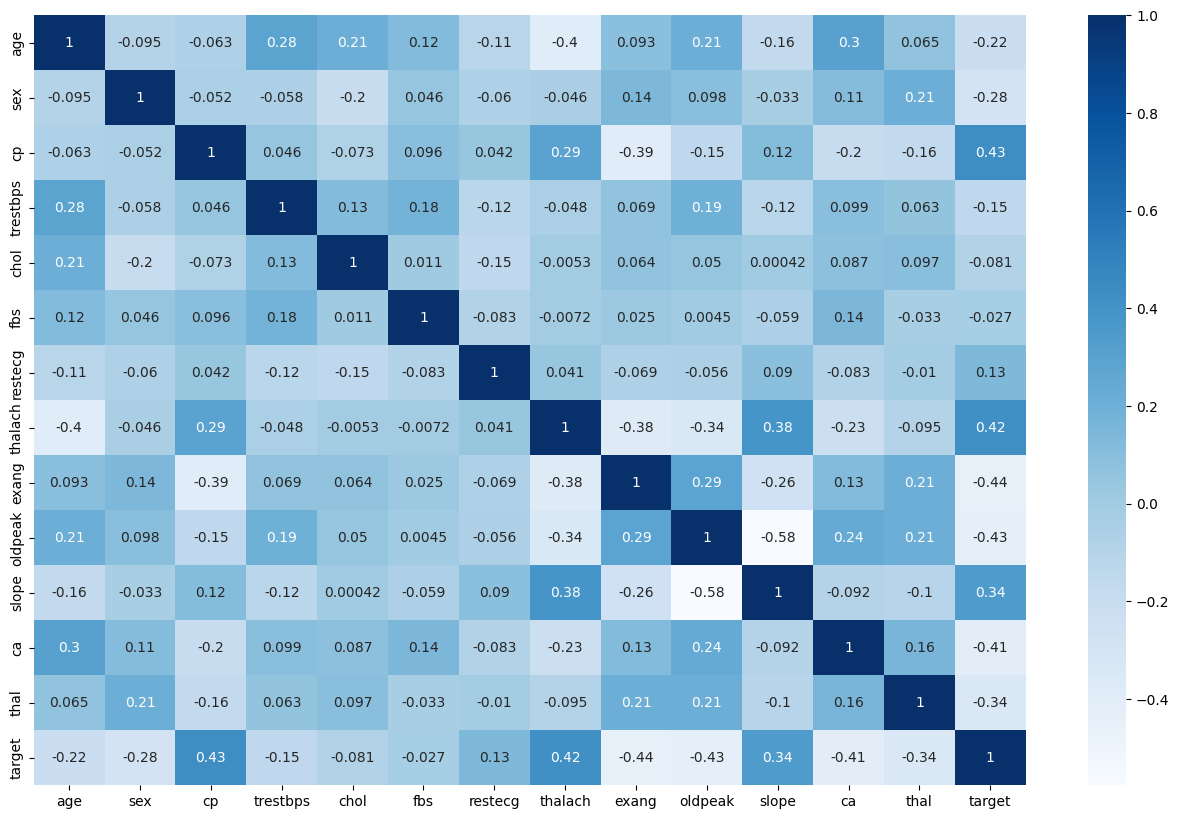

In [189]:
plt.figure(figsize=(16,10))
sns.heatmap(hd.corr(),annot=True,cmap="Blues")

### Tratando a base

#### Separando variaveis categoricas e nominais

In [190]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [191]:
categoricas=["sex","cp","fbs","restecg","exang","slope","ca","thal"]
numericas=["age","trestbps","chol","thalach","oldpeak"]

### Analisando Colunas

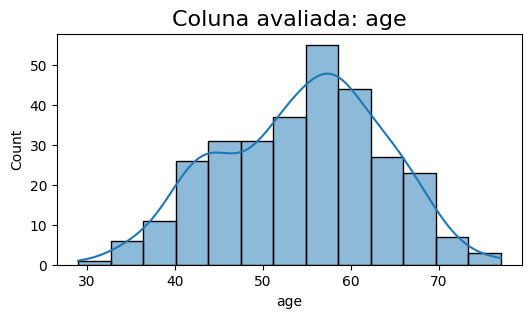

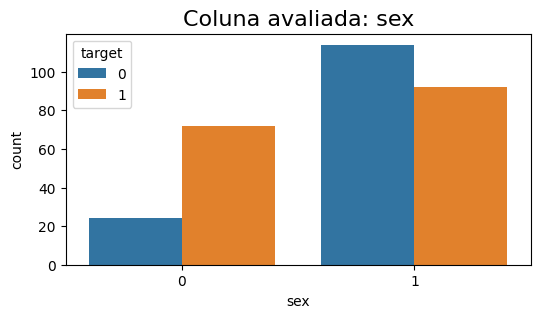

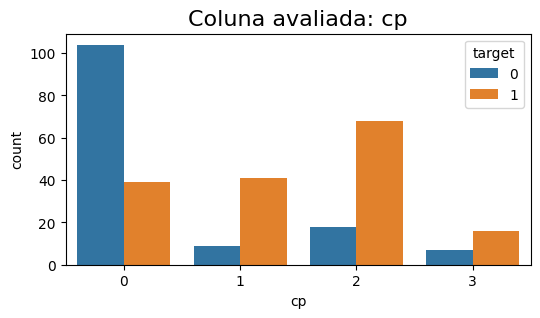

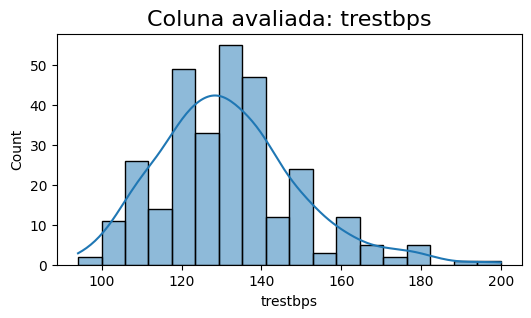

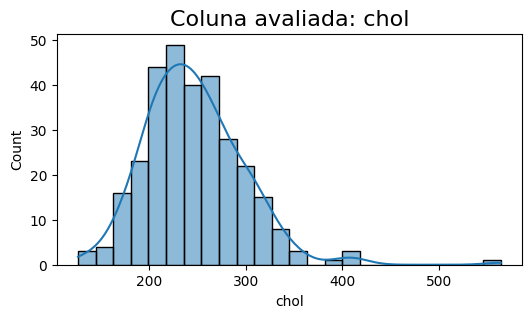

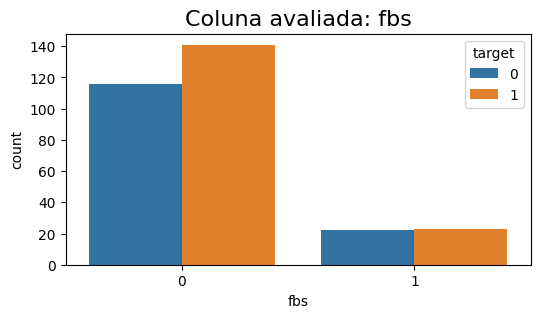

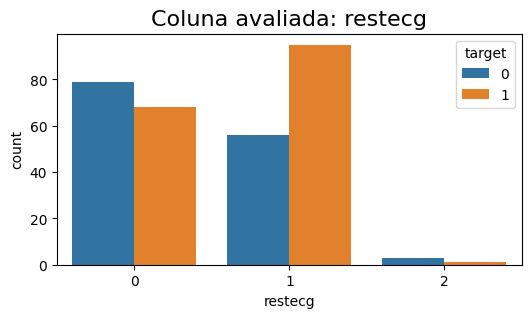

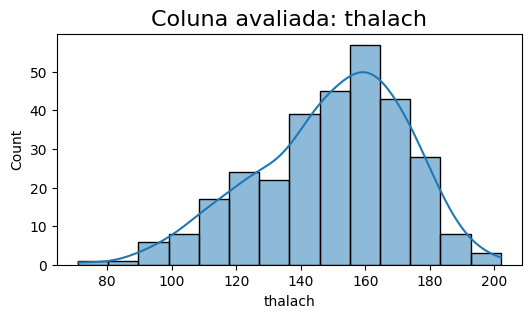

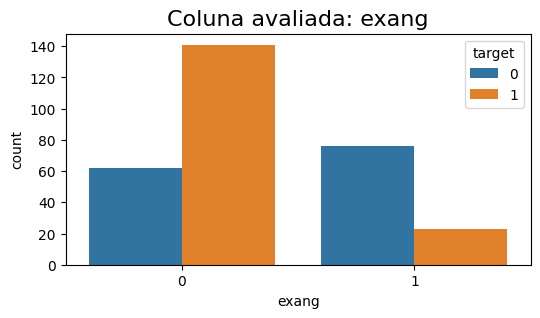

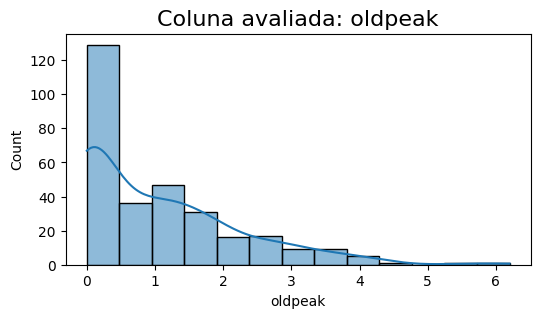

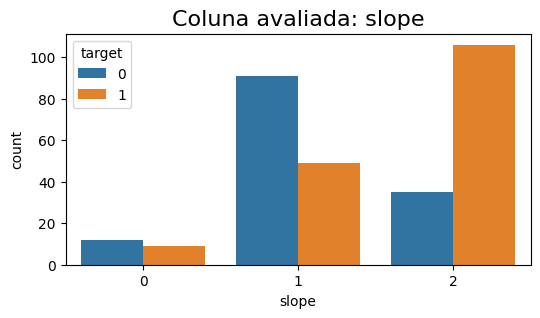

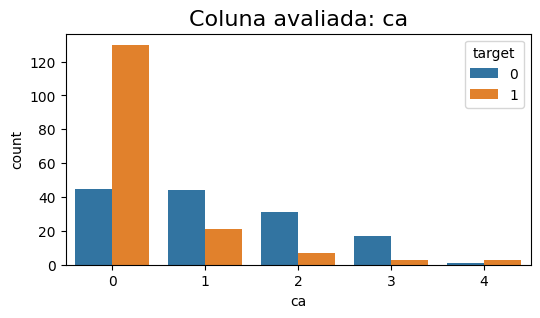

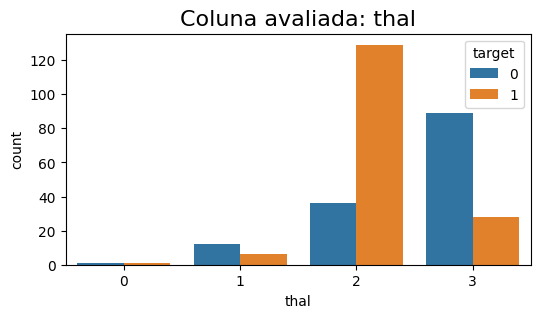

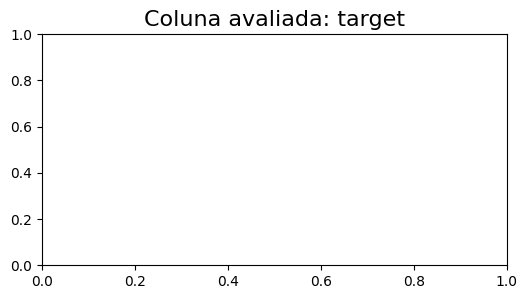

In [192]:
for c in hd.columns:
    plt.figure(figsize=(6,3))
    plt.title(f"Coluna avaliada: {c}",fontsize=16)
    if c in categoricas:
        sns.countplot(x=hd[c],hue=hd["target"])
    if c in numericas:
        sns.histplot(hd[c],kde=True)
    else:
        pass

### Removendo Outliers

<Axes: >

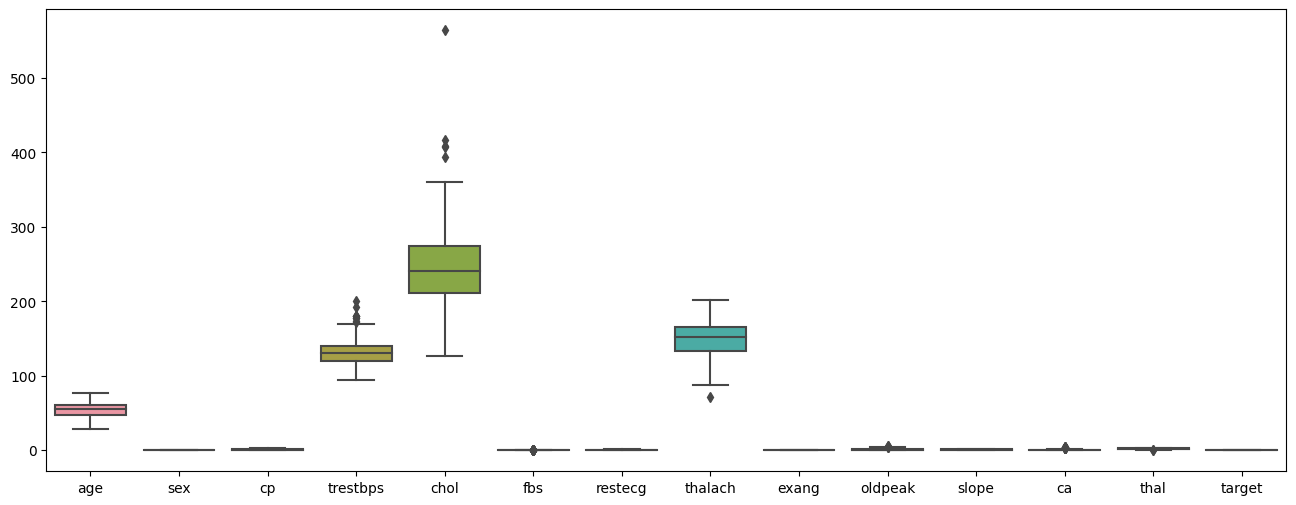

In [193]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd)

In [194]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [195]:
hd["trestbps"].quantile(0.99)

180.0

In [196]:
hd1=hd[hd["trestbps"]< hd["trestbps"].quantile(0.99)]

In [197]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [198]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [199]:
hd2=hd1[hd1["chol"] <= hd1["chol"].quantile(0.98)]

In [200]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

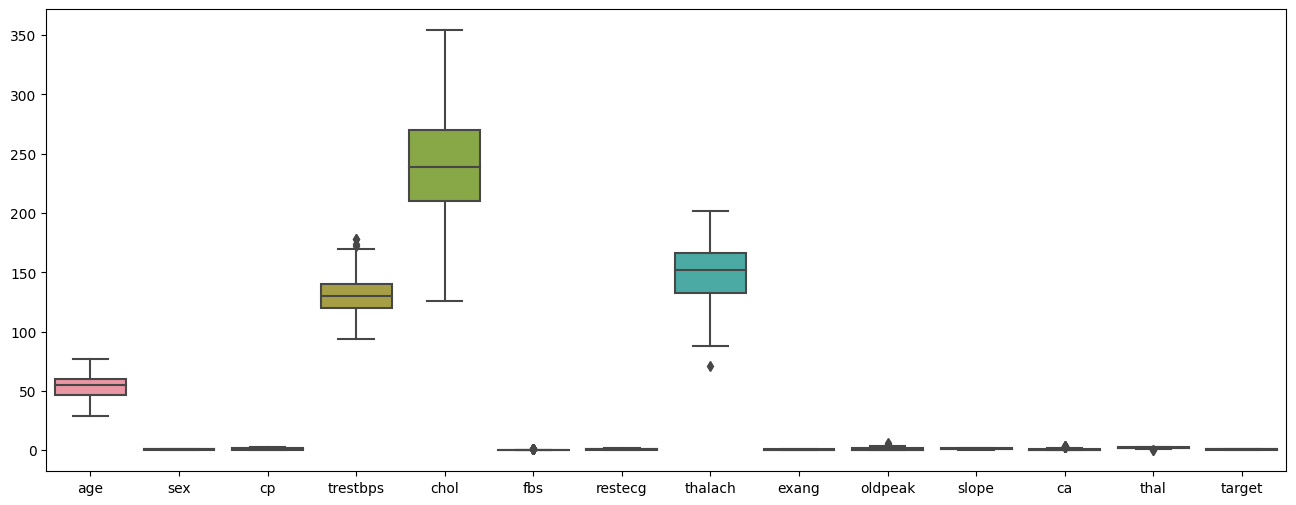

In [201]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd2)

In [202]:
hd2["thalach"].quantile(0.005)

88.9

In [203]:
hd3=hd2[hd2["thalach"]>hd2["thalach"].quantile(0.005)]

<Axes: >

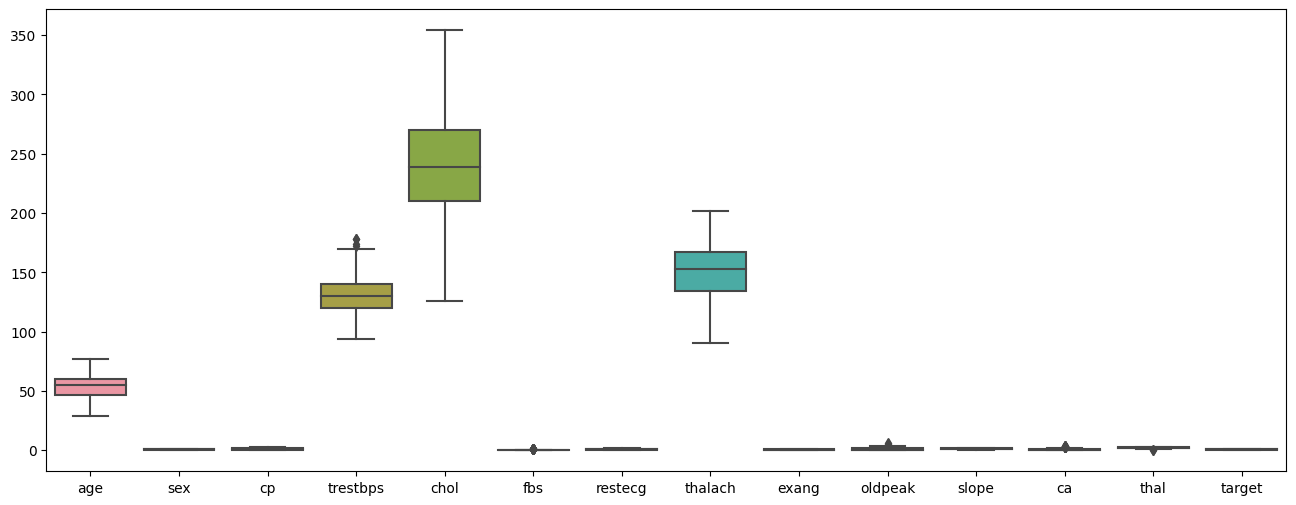

In [204]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd3)

In [205]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [206]:
hd4 = pd.get_dummies(hd3,columns=categoricas,drop_first=True)

In [207]:
hd4.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Treinando Modelo

#### Separando x e y

In [208]:
x=hd4.drop("target",axis=1)
y=hd4["target"]

In [209]:
x

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,160,273,125,0.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


#### Criando uma função para aplicar todos os modelos

In [217]:
def relatorio_ml(df,algoritimo,opt=2):
    x=df.drop("target",axis=1)
    y=df["target"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    if opt==0:
        ml=algoritimo(max_iter=1000)
    elif opt==1:
        ml=algoritimo(n_estimators=1000)
    elif opt==2:
        ml=algoritimo()
    
    ml.fit(x_train,y_train)
    score_train=ml.score(x_train,y_train)
    score_test=ml.score(x_test,y_test)
    y_previsto=ml.predict(x_test)
    cm=confusion_matrix(y_test,y_previsto)
    
    print(f"Acurácia treino:  {score_train*100:.2f}%")
    print(f"Acurácia teste: {score_test*100:.2f}%")
    print("... CLASSIFICATION REPORT ...")
    print(classification_report(y_test,y_previsto))
    print("... CONFUSION MATRIX ...")
    sns.heatmap(cm,annot=True,cmap="Blues" )

    return score_train,score_test
    

#### Aplicando Modelos

##### LogisticRegression

C:\Users\raynald.e.amaral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia treino:  87.01%
Acurácia teste: 82.76%
... CLASSIFICATION REPORT ...
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

... CONFUSION MATRIX ...


(0.8701298701298701, 0.8275862068965517)

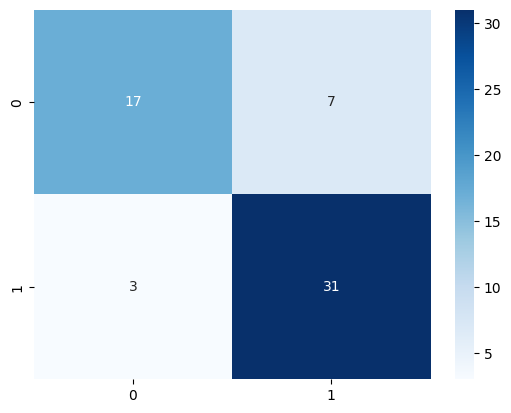

In [224]:
relatorio_ml(hd4,LogisticRegression,opt=0)

Acurácia treino:  100.00%
Acurácia teste: 72.41%
... CLASSIFICATION REPORT ...
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.76      0.76      0.76        34

    accuracy                           0.72        58
   macro avg       0.72      0.72      0.72        58
weighted avg       0.72      0.72      0.72        58

... CONFUSION MATRIX ...


(1.0, 0.7241379310344828)

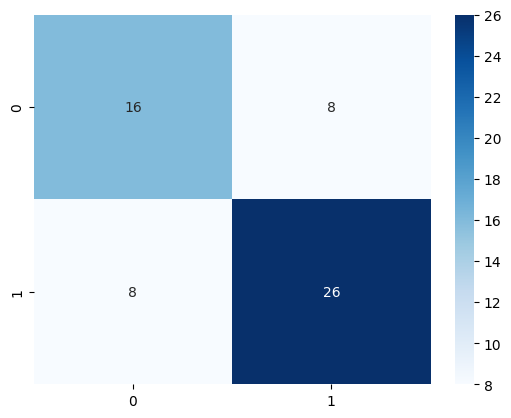

In [226]:
relatorio_ml(hd4,DecisionTreeClassifier)

Acurácia treino:  92.21%
Acurácia teste: 81.03%
... CLASSIFICATION REPORT ...
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.83      0.85      0.84        34

    accuracy                           0.81        58
   macro avg       0.81      0.80      0.80        58
weighted avg       0.81      0.81      0.81        58

... CONFUSION MATRIX ...


(0.922077922077922, 0.8103448275862069)

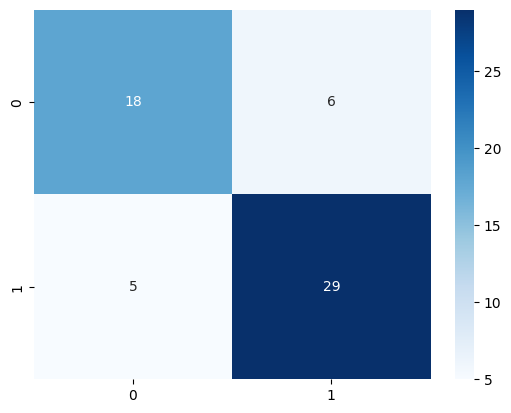

In [227]:
relatorio_ml(hd4,AdaBoostClassifier)

Acurácia treino:  100.00%
Acurácia teste: 75.86%
... CLASSIFICATION REPORT ...
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.78      0.82      0.80        34

    accuracy                           0.76        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.76      0.76      0.76        58

... CONFUSION MATRIX ...


(1.0, 0.7586206896551724)

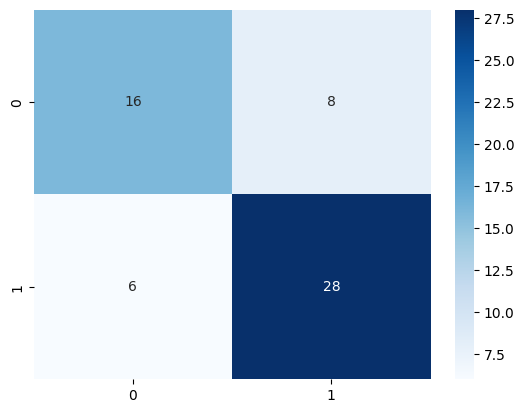

In [228]:
relatorio_ml(hd4,RandomForestClassifier)

Acurácia treino:  77.06%
Acurácia teste: 60.34%
... CLASSIFICATION REPORT ...
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.67      0.65      0.66        34

    accuracy                           0.60        58
   macro avg       0.59      0.59      0.59        58
weighted avg       0.61      0.60      0.60        58

... CONFUSION MATRIX ...


(0.7705627705627706, 0.603448275862069)

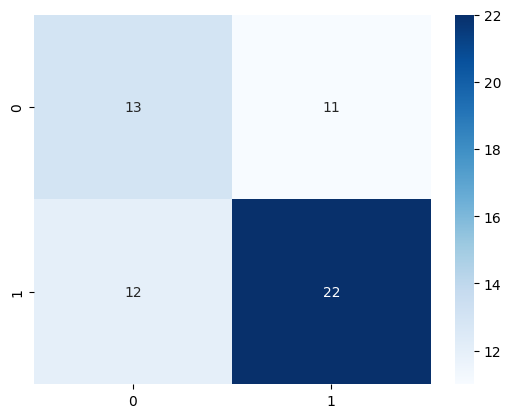

In [229]:
relatorio_ml(hd4,KNeighborsClassifier)